# Tarea - Ajuste de curvas

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [52]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

In [53]:
data = pd.read_excel("costo.xlsx")
data

,Año,Costo
0,2014,10.051101
1,2015,9.259127
2,2016,9.444813
3,2017,9.557723
4,2018,9.977324
5,2019,10.298326
6,2020,10.447217
7,2021,11.153055
8,2022,10.590784
9,2023,10.657418


In [54]:
data["Costo"].min()

9.259127

In [55]:
data["Costo"].max()

14.436149

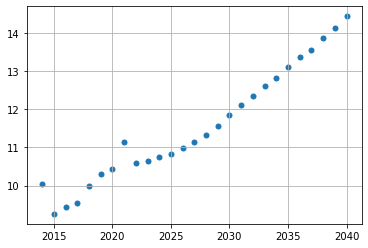

In [56]:
import matplotlib.pyplot as plt

x = data["Año"] - 2014
y = data["Costo"]
plt.figure()
plt.scatter(x +2014, y, s=25)
plt.grid()

In [57]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 2.866544288607454
 hess_inv: array([[ 0.07010583, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([2.77161598e-06, 1.78813934e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.16668595, 0.18446341])

In [58]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 1.468159848182989
 hess_inv: array([[ 1.44225501e-01, -2.17569779e-02,  6.84181695e-04],
       [-2.17569779e-02,  4.57454412e-03, -1.64203609e-04],
       [ 6.84181695e-04, -1.64203609e-04,  6.31552346e-06]])
      jac: array([-5.06639481e-07, -2.38418579e-07,  7.30156898e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.62195800e+00, 7.51980745e-02, 4.20251321e-03])

In [59]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 1.4278246617685104
 hess_inv: array([[ 2.27239826e-01, -6.41151415e-02,  4.83484862e-03,
        -1.06427367e-04],
       [-6.41151415e-02,  2.61897388e-02, -2.28230211e-03,
         5.43101124e-05],
       [ 4.83484862e-03, -2.28230211e-03,  2.13870986e-04,
        -5.32192269e-06],
       [-1.06427367e-04,  5.43101124e-05, -5.32192269e-06,
         1.36459247e-07]])
      jac: array([-2.80141830e-06, -1.92224979e-06, -1.87903643e-05, -4.13790345e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 227
      nit: 9
     njev: 43
   status: 2
  success: False
        x: array([9.54201771e+00, 1.15988009e-01, 2.05512600e-04, 1.02487159e-04])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

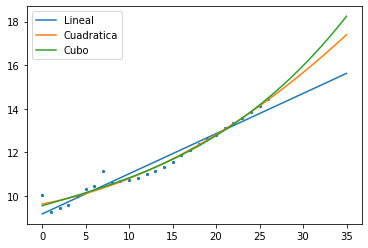

In [60]:
xn = np.linspace(0, 35, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Lineal")
plt.plot(xn, yn2, label="Cuadratica")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

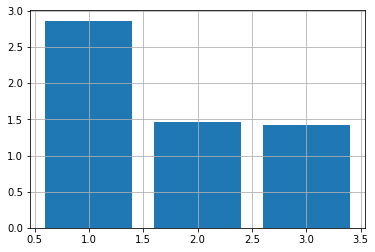

In [61]:
plt.figure()
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.grid()


---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [63]:
import pandas as pd
data_2 = pd.read_csv('population_data.csv')
data_2.head()

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


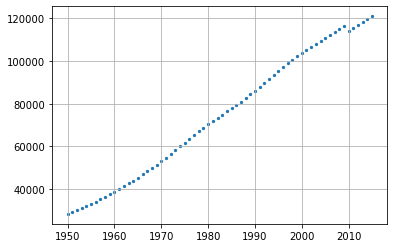

In [64]:
import matplotlib.pyplot as plt

x2 = data_2["Year"] - 1950
y2 = data_2["Poblacion"] 
plt.figure()
plt.scatter(x2 + 1950, y2, s=5)
plt.grid()

In [65]:

sol2 = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x2, y2))
costo_2 = sol2.fun
resultados_2 = sol2.x
sol2

      fun: 212137169.55821073
 hess_inv: array([[3.47137380e-08, 5.85498128e-07],
       [5.85498128e-07, 1.18729245e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 117
      nit: 14
     njev: 39
   status: 0
  success: True
        x: array([24137.98709945,  1543.97406128])

In [66]:

sol22 = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x2, y2))
costo_22 = sol22.fun
resultados_22 = sol22.x
sol22

      fun: 210941621.4561555
 hess_inv: array([[ 1.61239624e-02,  6.35343728e-06, -6.35761186e-06],
       [ 6.35343728e-06,  5.01635000e-09, -4.66812722e-09],
       [-6.35761186e-06, -4.66812722e-09,  4.66310771e-09]])
      jac: array([0., 0., 2.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 344
      nit: 10
     njev: 83
   status: 2
  success: False
        x: array([2.44256275e+04, 1.51701101e+03, 4.14800065e-01])

In [67]:

sol23 = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x2, y2))
costo_23 = sol23.fun
resultados_23 = sol23.x
sol23

      fun: 25240442.639243323
 hess_inv: array([[ 5.14971782e-02, -2.21213882e-03,  6.06814865e-09,
         4.01122772e-07],
       [-2.21213882e-03,  1.28456854e-04, -1.08730092e-09,
        -2.81275655e-08],
       [ 6.06814865e-09, -1.08730092e-09,  4.03730382e-11,
        -4.02344824e-13],
       [ 4.01122772e-07, -2.81275655e-08, -4.02344824e-13,
         7.36601459e-12]])
      jac: array([ 0.  ,  0.  , -0.25,  0.  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 332
      nit: 11
     njev: 64
   status: 2
  success: False
        x: array([ 2.84777546e+04,  7.39079480e+02,  3.05648612e+01, -3.09231765e-01])

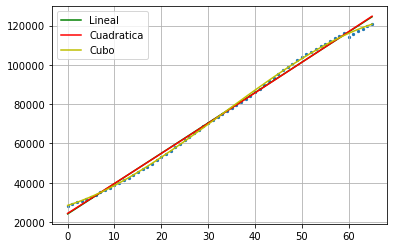

In [68]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x2, y2, s=5) 
plt.plot(x2, sol2.x[0] + sol2.x[1]*x2, "g", label="Lineal") 
plt.plot(x2, sol22.x[0] + sol22.x[1]*x2 + sol22.x[2]*x2**2, "r", label="Cuadratica") 
plt.plot(x2, sol23.x[0] + sol23.x[1]*x2 + sol23.x[2]*x2**2 + sol23.x[3]*x2**3, "y", label="Cubo") 
plt.grid()
plt.legend(loc="best")

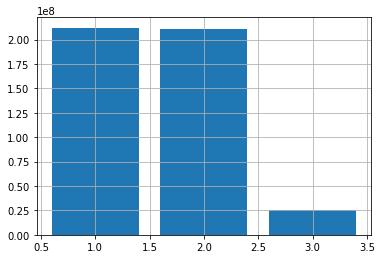

In [69]:
plt.figure()
plt.bar([1, 2, 3], [costo_2, costo_22, costo_23])
plt.grid()


### Punto 2

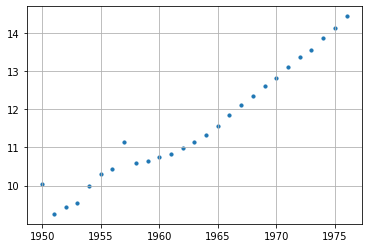

In [70]:
import matplotlib.pyplot as plt

x2 = data_2["Year"] - 1950
y3 = data_2["Nacimientos"] 
plt.figure()
plt.scatter(x + 1950, y, s=10)
plt.grid()

In [71]:

sol3 = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x2, y3))
costo_3 = sol3.fun
resultados_3 = sol3.x
sol3

      fun: 4737913718624.1455
 hess_inv: array([[ 2.97526477e-02, -6.80295897e-04],
       [-6.80295897e-04,  2.08942535e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 5
     njev: 14
   status: 0
  success: True
        x: array([1563285.77055023,   21969.77231645])

In [72]:
sol32 = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x2, y3))
costo_32 = sol32.fun
resultados_32 = sol32.x
sol32

      fun: 492921083481.38995
 hess_inv: array([[ 9.32078806e-02, -5.69164659e-03,  7.24180100e-05],
       [-5.69164659e-03,  4.33058057e-04, -6.04992499e-06],
       [ 7.24180100e-05, -6.04992499e-06,  8.92197975e-08]])
      jac: array([ -4096.,   4096., 274432.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 236
      nit: 8
     njev: 56
   status: 2
  success: False
        x: array([ 1.02117480e+06,  7.27739945e+04, -7.81512423e+02])

In [73]:
sol33 = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x2, y3))
costo_33 = sol33.fun
resultados_33 = sol33.x
sol33

      fun: 441782319073.0247
 hess_inv: array([[ 3.44191494e-02, -3.17211529e-03,  8.03193306e-05,
        -6.20615816e-07],
       [-3.17211529e-03,  5.92425695e-04, -2.17899626e-05,
         2.14623087e-07],
       [ 8.03193306e-05, -2.17899626e-05,  9.42234316e-07,
        -1.01733043e-08],
       [-6.20615816e-07,  2.14623087e-07, -1.01733043e-08,
         1.15722905e-10]])
      jac: array([     0.,      0.,   4096., 147456.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 281
      nit: 13
     njev: 54
   status: 2
  success: False
        x: array([ 1.08834892e+06,  5.98683739e+04, -2.81223935e+02, -5.13171031e+00])

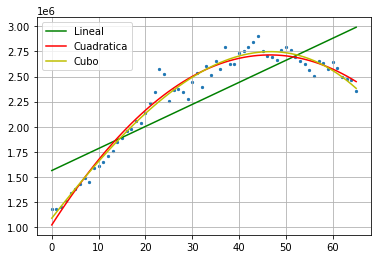

In [74]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x2, y3, s=5) 
plt.plot(x2, sol3.x[0] + sol3.x[1]*x2, "g", label="Lineal") 
plt.plot(x2, sol32.x[0] + sol32.x[1]*x2 + sol32.x[2]*x2**2, "r", label="Cuadratica") 
plt.plot(x2, sol33.x[0] + sol33.x[1]*x2 + sol33.x[2]*x2**2 + sol33.x[3]*x2**3, "y", label="Cubo") 
plt.grid()
plt.legend(loc="best")

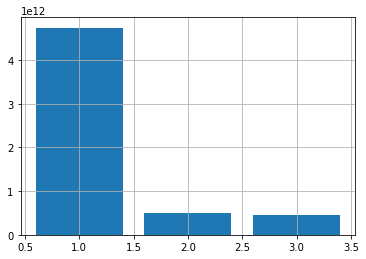

In [75]:
plt.figure()
plt.bar([1, 2, 3], [costo_3, costo_32, costo_33])
plt.grid()


IndexError: index 2 is out of bounds for axis 1 with size 2

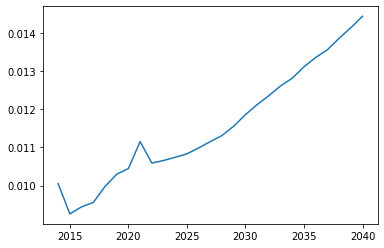

In [76]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---